---
# Plotting

# To make basic plots, we will learn the `numpy` and `matplotlib` packages
- `numpy` (usually imported as `np`): numerical data and analysis (more in Chapter 6)
- `matplotlib`: (usually just the `pyplot` submodule imported as `plt`) all things plotting (Chapter 7)

We'll study both in more detail later. Right now, we'll focus on basic synthesis and use of `numpy`'s arrays and `matplotlib.pyplot`'s simplified interface lets us teach you "enough to be dangerous".

# Baby's first plot
`matplotlib's`'s `plot` function takes in two iterables **of equal size** and treats them as the x and y values of a series of points to connect with lines.

In [2]:
import matplotlib.pyplot as plt
# you might not need these, but they help ensure that plots show up and look the same as on anyone else's setup
%matplotlib inline
plt.style.use('default')

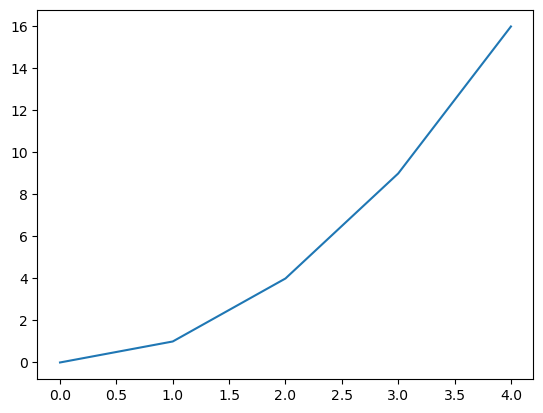

In [3]:
import matplotlib.pyplot as plt
plt.plot([0, 1, 2, 3, 4], [0, 1, 4, 9, 16])

# `scatter` works the same, but just shows the points without connecting lines

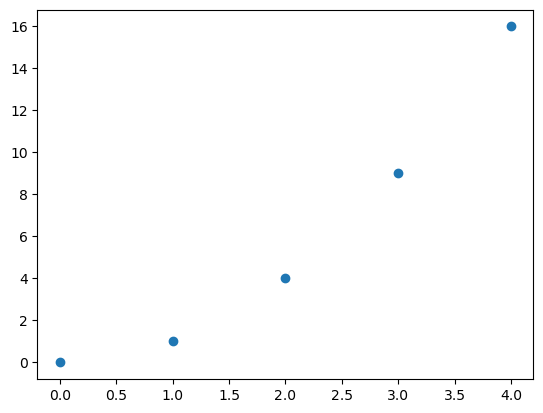

In [4]:
plt.scatter([0, 1, 2, 3, 4], [0, 1, 4, 9, 16])

# Example: Plotting a sine curve
We want to plot a smooth sine curve, but we can only plot series of straight line segments between points, so instead we just need to create A LOT of points. Iteration makes this much easier than hard-coding each point, but it is still tedious.

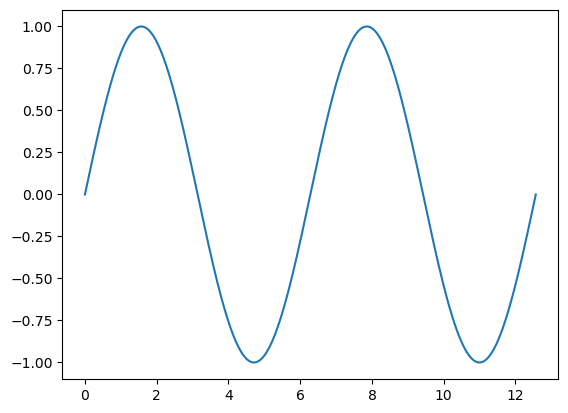

In [5]:
from math import sin, pi
# how many points we want to use; can change to make resolution higher or lower
num_points = 1001
# left and right end points on the x-axis
x_start, x_stop = 0, 4 * np.pi

# build up x- and y-values from empty arrays
xs, ys = [], []
for i in range(num_points):
    # get the ith x value; makes sure zeroth is x_star and last is x_stop
    new_x = x_start + i * (x_stop - x_start) / (num_points - 1)
    new_y = sin(new_x)
    xs.append(new_x)
    ys.append(new_y)
plt.plot(xs, ys)

# `numpy` Arrays: Our Long-awaited Savior
So far, we've only used the plotting capabilities of `matplotlib` by plotting data in lists. `numpy`'s arrays can make working with the data we want to plot **much** easier. We will exclusively import `numpy` as `np`, which is standard in the python community.

`numpy` arrays are iterables with the following constraints
- All elements must be of the same type (all floats, all ints, etc.)
- They cannot be easily resized (no append, remove, etc.)

What we get in return, though, is **vectorization**. This means that if `ary` is a `numpy` array, we can do the following:
- `ary * 2.0` returns a new array where each element is twice the corresponding element of `ary`
- `ary * ary` returns a new array where each element is the square of the corresponding element of `ary`
- `np.sin(ary)` returns a new array where each element is the sine of the corresponding element of `ary`

Note that in the last example, we had to use `numpy`'s version of `sin`. It has some special sauce that allows it to work on arrays *or* scalars, so **there's really no reason to use the `math` module any more**.

# Generating `numpy` arrays
The most straightforward way to create `numpy` arrays is to just cast an iterable into an `array` using `numpy`'s `array` constructor:

In [8]:
import numpy as np
xs = np.array([0, 1, 2, 3, 4])
ys = xs**2
print(xs, type(xs))
print(ys, type(ys))

[0 1 2 3 4] <class 'numpy.ndarray'>
[ 0  1  4  9 16] <class 'numpy.ndarray'>


So sometimes you really do need the whole `append` strategy at first, but then you can cast to a `numpy` array and get the best of both worlds. However, for the case of making a large number of evenly spaced values, `numpy` has a much more elegant solution: `linspace`. It takes three arguments: a starting value, an ending value, and a number of desired points in between. **Unlike many other iterable generators, `linspace` DOES INCLUDE THE END POINT**.

In [9]:
num_points = 1001
xs = np.linspace(0, 4, num_points)
print("The first element of xs is {:.1f}, the last element is {:.4f}, and it has {:d} elements.".format(xs[0], xs[-1], len(xs)))

The first element of xs is 0.0, the last element is 4.0000, and it has 1001 elements.


# Example: Sine curve revisited
Let's clean up our previous example using `linspace` and vectorization:

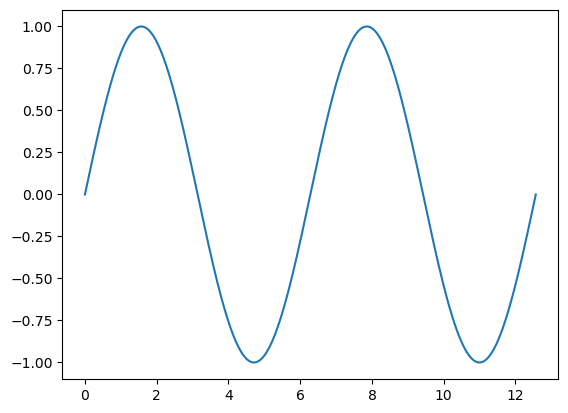

In [10]:
# how many points we want to use; can change to make resolution higher or lower
num_points = 1001
# left and right end points on the x-axis
x_start, x_stop = 0, 4 * np.pi

# build up x- and y-values from empty arrays
xs = np.linspace(x_start, x_stop, num_points)
ys = np.sin(xs)
plt.plot(xs, ys)

# Example: Adding a Second Dataset
To add a second dataset to the same plot, simply call `plot` again in the same cell, likely with different data.

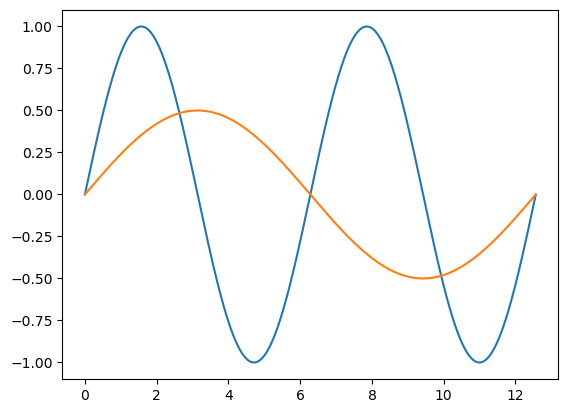

In [11]:
# how many points we want to use; can change to make resolution higher or lower
num_points = 1001
# left and right end points on the x-axis
x_start, x_stop = 0, 4 * np.pi

# build up x- and y-values from empty arrays
xs = np.linspace(x_start, x_stop, num_points)
ys = np.sin(xs)
plt.plot(xs, ys)

# NEW STUFF
ys2 = 0.5 * np.sin(0.5 * xs)
plt.plot(xs, ys2)

# `matplotlib` automatically cycles through many colors, but you can customize this in the call to `plot`
You can also customize the 
- line width (`lw=`; best to keep it above 1.5 pt)
- line style (`ls=`; dashed, dotted, etc.)
- label that would appear in a legend (`label=`)
- symbols to be plotted at actual data points (`marker=`; creates symbols `scatter`-style)
within the call to `plot`.

There are **many** optional keyword arguments that you will mostly look up since going over each and every one is not a great way to learn them.

# Extended Example: Double-Encoding the Second Dataset

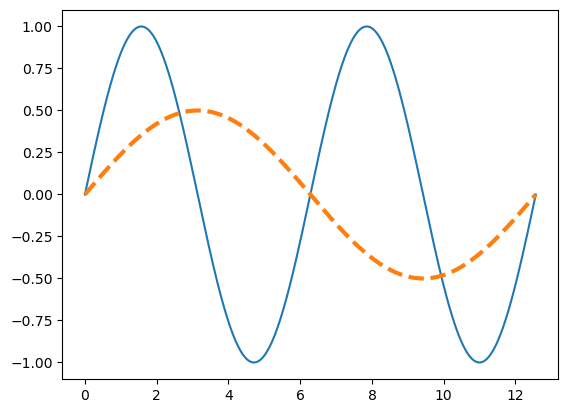

In [12]:
# how many points we want to use; can change to make resolution higher or lower
num_points = 1001
# left and right end points on the x-axis
x_start, x_stop = 0, 4 * np.pi

# build up x- and y-values from empty arrays
xs = np.linspace(x_start, x_stop, num_points)
ys = np.sin(xs)
plt.plot(xs, ys, label='$f(\phi) = \sin(\phi)$')

# NEW STUFF
ys2 = 0.5 * np.sin(0.5 * xs)
plt.plot(xs, ys2, ls='--', lw=3, label=r'$f(\phi) = \frac{1}{2}\sin\left(\frac{1}{2}\phi\right)$')

# Legends, Labels, and Limits
To place a legend, we can use `matplotlib`'s `legend` function **after** we have plotted all datasets we want to appear in the legend **and** specified a `label` in each call to `plot` or `scatter`. Specify the position of the legend with an integer code or string as the sole argument to `legend` (see talbe 3.1 in Hill).

We can (and should!) add labels to our axes, and even a title using the `xlabel`, `ylabel`, and `title` commands, which take a string as an argument. $\rm\LaTeX$ is allowed and encouraged! Make your plots pretty!

We can also explicitly set the limits of the *x*- and *y*-axes using `xlim` and `ylim`, which take two numbers as arguments, indicating the left and right endpoints. You can use this to invert an axis (have it incrasing to the left/bottom).

# Further Extended Example

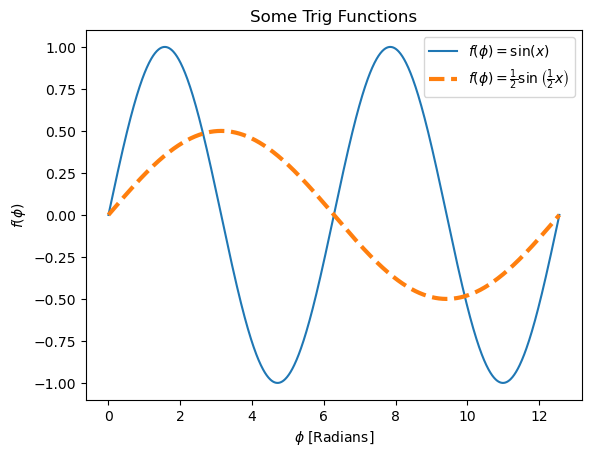

In [13]:
# how many points we want to use; can change to make resolution higher or lower
num_points = 1001
# left and right end points on the x-axis
x_start, x_stop = 0, 4 * np.pi

# build up x- and y-values from empty arrays
xs = np.linspace(x_start, x_stop, num_points)
ys = np.sin(xs)
plt.plot(xs, ys, label='$f(\phi) = \sin(x)$')

# NEW STUFF
ys2 = 0.5 * np.sin(0.5 * xs)
plt.plot(xs, ys2, ls='--', lw=3, label=r'$f(\phi) = \frac{1}{2}\sin\left(\frac{1}{2}x\right)$')

# add labels to axes and a title
plt.xlabel('$\phi$ [Radians]')
plt.ylabel('$f(\phi)$')
plt.title('Some Trig Functions')

# add a legend; let matplotlib pick the location
plt.legend(loc='best')

# Saving to a file
`matplotlib` provides the `savefig` function, which, unsurprisingly, saves the current plot to a file. You must at least provide a name. The extension determines what type it will output. You'll usually want `.pdf` (almost always the best since it saves as a vector graphic) or `.png` (great for being small and web-friendly).

Additional controls are available to `savefig` to specify whitesapce padding. To trim margins as much as possible, add optional keyword argument `bbox_inches = 'tight'`. For bitmap images, you can specify the dots per inch. Higher values mean higher resolution images. For very high resolution, can go wtih `dpi=300`. 

You can save one figure to multiple formats with multiple calls to `savefig`.


# Saving our masterpiece

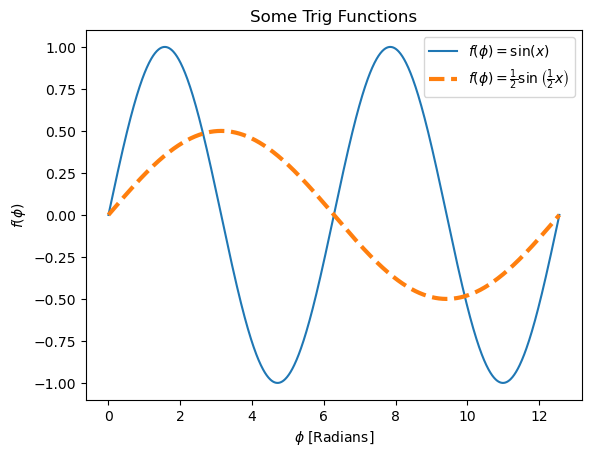

In [14]:
# how many points we want to use; can change to make resolution higher or lower
num_points = 1001
# left and right end points on the x-axis
x_start, x_stop = 0, 4 * np.pi

# build up x- and y-values from empty arrays
xs = np.linspace(x_start, x_stop, num_points)
ys = np.sin(xs)
plt.plot(xs, ys, label='$f(\phi) = \sin(x)$')

# NEW STUFF
ys2 = 0.5 * np.sin(0.5 * xs)
plt.plot(xs, ys2, ls='--', lw=3, label=r'$f(\phi) = \frac{1}{2}\sin\left(\frac{1}{2}x\right)$')

# add labels to axes and a title
plt.xlabel('$\phi$ [Radians]')
plt.ylabel('$f(\phi)$')
plt.title('Some Trig Functions')

# add a legend; let matplotlib pick the location
plt.legend(loc='best')

# save to pdf (bbox_inches sets width of "bounding box", or how much whitespace to put around the
# figure. 'tight' means make it as small as possible)
plt.savefig('masterpiece.pdf', bbox_inches='tight')

# save to png with 300 dpi (setting dpi is optional, though I don't remember what it defaults to)
plt.savefig('masterpiece.png', bbox_inches='tight', dpi=300)